# Files and imports

In [1]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np


#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_msg_pre_proc.csv'

file_tag = 'df_msg_encoding'

data = pd.read_csv(filepath)

In [2]:
%run 'scripts/dslabs_functions.py'

# Variable Encoding

## Ordinal Encoding


### Binary

In [3]:
from pandas import read_csv, DataFrame
#from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

data: DataFrame = read_csv(filepath)
vars: dict[str, list] = get_variable_types(data)

true_false: dict[str, int] = {"false": 0, "False": 0, "f": 0, False: 0, "true": 1, "True": 1, "t": 1, True: 1}
#channel_msg_values: dict[str, int] = {"mobile_push": 0, "email": 1}
time_of_day_values: dict[str, int] = {"Morning": 0, "Afternoon": 1}

encoding: dict[str, dict[str, int]] = {
    #"is_opened": true_false,
    "is_clicked": true_false,
    #"is_unsubscribed": true_false,
    #"is_hard_bounced": true_false,
    #"is_soft_bounced": true_false,
    #"is_complained": true_false,
    #"is_blocked": true_false,  # Added
    #"is_purchased": true_false,
    "subject_with_personalization": true_false,
    "subject_with_deadline": true_false,
    "subject_with_emoji": true_false,
    "subject_with_bonuses": true_false,
    "subject_with_discount": true_false,
    "subject_with_saleout": true_false,
    "is_weekend": true_false,  # Added
    "time_of_day": time_of_day_values  # Added
 #   "channel_msg": channel_msg_values  # Added
}
data_enc: DataFrame = data.replace(encoding, inplace=False)
data_enc.head()

,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,subject_with_saleout,day_of_year,week_of_month,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day
0,desktop,gmail.com,2021-04-30 05:00:37+00:00,1,trigger,multichannel,abandoned cart,NaN,NaN,NaN,...,NaN,120,5,0,4,30,April,5,0,0
1,desktop,yandex.ru,2021-04-30 05:00:41+00:00,1,trigger,multichannel,abandoned view,NaN,NaN,NaN,...,NaN,120,5,0,4,30,April,5,0,0
2,NaN,yandex.ru,2021-04-30 05:00:42+00:00,0,trigger,multichannel,abandoned view,NaN,NaN,NaN,...,NaN,120,5,0,4,30,April,5,0,0
3,NaN,mail.ru,2021-04-30 05:00:47+00:00,0,transactional,email,order ready for pickup,NaN,88.0,0.0,...,0.0,120,5,0,4,30,April,5,0,0
4,desktop,mail.ru,2021-04-30 05:00:55+00:00,0,trigger,multichannel,abandoned cart,NaN,NaN,NaN,...,NaN,120,5,0,4,30,April,5,0,0


### Symbolic

In [4]:
for v in vars["symbolic"]:
    print(v, data_enc[v].unique())

platform ['desktop' nan 'smartphone' 'phablet' 'tablet']
email_provider ['gmail.com' 'yandex.ru' 'mail.ru' 'inbox.ru' 'icloud.com' 'ya.ru'
 'rambler.ru' 'bk.ru' 'list.ru' nan 'private' 'internet.ru' 'e1.ru'
 'rencons.com' 'yandex.com' 'nxt.ru' 'tut.by' 'ro.ru' 'hotmail.com'
 'lenta.ru' 'yahoo.com' 'citydom.ru' 'mail2000.ru' 'live.ru'
 'myrambler.ru' '74.ru' 'protonmail.com' 'sampo.ru' 'russianpost.ru'
 'aol.com' 'chelny.com' 'me.com' 'yandex.ua' 'mail.ua' 'ngs.ru' 'narod.ru'
 'tatar.ru' 'my.com' '59.ru' '63.ru' '29.ru' 'ukr.net' 'googlemail.com'
 'k66.ru' 'tpu.ru' 'ieloud.com' 'omgau.org' 'pnu.edu.ru' 'ormamail.ru'
 'phystech.edu' 'istu.edu' 'sochi.com' 'auchan.ru' 'dc2b.ru' 'udm.ru'
 'yandex.by' 'sibmail.com' 'i.ua' 'autorambler.ru' 'aport.ru' 'meta.ua'
 'aaanet.ru' 'yandex.kz' 'li.ru' 'bigmir.net' 'tyt.by' 'orsk.ru' 'ua.fm'
 'rkmail.ru' 'rarus.ru' 'rtural.ru' 'icoud.com' 'mail.com' 'spark-mail.ru'
 'phkp.ru' 'land.ru' 'qq.com' 'tn.ru' 'hotbox.ru' 'tl-istu.com' 's7.ru'
 'nextmail.ru' 

In [5]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

variable_types: dict[str, list] = get_variable_types(data_enc)

# Calculate the number of distinct values for each column
distinct_counts = {var_type: {col: data[col].nunique() for col in cols} for var_type, cols in variable_types.items()}

# Print the results
for var_type, counts in distinct_counts.items():
    print(f"{var_type.capitalize()} Variables:")
    for col, count in counts.items():
        print(f"  {col}: {count} distinct values")
    print()

Numeric Variables:
  total_count: 36 distinct values
  subject_length: 29 distinct values
  day_of_year: 45 distinct values
  week_of_month: 5 distinct values
  day_of_week_nr: 7 distinct values
  day_of_month: 31 distinct values
  hour: 23 distinct values
  min: 60 distinct values

Binary Variables:
  is_clicked: 2 distinct values
  subject_with_personalization: 2 distinct values
  subject_with_deadline: 2 distinct values
  subject_with_emoji: 2 distinct values
  subject_with_bonuses: 2 distinct values
  subject_with_discount: 2 distinct values
  subject_with_saleout: 2 distinct values
  is_weekend: 2 distinct values

Date Variables:
  sent_at: 87146 distinct values

Symbolic Variables:
  platform: 4 distinct values
  email_provider: 88 distinct values
  campaign_type: 3 distinct values
  channel_cmp: 3 distinct values
  topic: 16 distinct values
  month: 3 distinct values
  time_of_day: 4 distinct values



## Logic

- campaign_type ['bulk' 'transactional' 'trigger']
    - transactional e trigger, pela sua definiçao, estao mais relacionados uns com os outros. o trigger e o bulk tem de estar mais afastados, ou entao transactional e bulk tem de estar afastados. 

- platform [nan 'phablet' 'smartphone' 'desktop' 'tablet']
    - according to their size and similarities/functionalities

- email_provider: Based on the perceived importance, similarity, and usage in Russia. This ranking considers the popularity and common usage of these email providers in Russia: The more well-known and commonly used providers receive lower values, while less common or less significant ones receive higher values.
    - Top Russian Providers (High Importance)
    - International Providers (Moderate Importance)
    - Other Russian Providers (Moderate to Low Importance)
    - Less Known or Incorrect Entries (Low Importance)
    - Generic or Non-Email Providers (Lowest Importance)

- channel_cmp ['mobile_push' 'email' 'multichannel']
    - In the context of a Russian e-commerce multichannel platform, we need to consider the effectiveness and common usage of each channel for sending campaigns and messages to clients. Here's a suggested ranking based on typical engagement and reach:

    - Multichannel: This involves using multiple channels to reach clients, which can increase engagement and effectiveness by combining the strengths of various channels.

    - Email: Email is a widely used and effective channel for detailed communication and marketing campaigns. It is commonly used in Russia for e-commerce communications.

    - Mobile Push: Mobile push notifications are effective for immediate and short notifications but may have lower engagement compared to email and multichannel approaches. However, they are still quite popular for quick updates and alerts.
- topic ['sale out' 'order created' 'profile updated' 'abandoned category'
 'added to wish list' 'order ready for pickup' 'subscribed'
 'abandoned cart' 'recent purchase' 'abandoned view' nan 'bonuses expired'
 'order cancelled' 'abandoned search' 'event']
    - based on their potential importance in the custmoer journey on a website, and also on common e-commerce and user interaction scenarios
    - Order-related topics: These are directly related to transactions and are typically of high importance.
        - order created
        - order ready for pickup
        - order cancelled
        - recent purchase
    - Abandoned actions: These indicate potential lost sales or user interest.
        - abandoned cart
        - abandoned category
        - abandoned view
        - abandoned search
    - User engagement: These involve user interactions and updates.
        - profile updated
        - added to wish list
        - subscribed
    - Promotional and informational: These are related to promotions and notifications.
        - price drop
        - sale out
        - bonuses expired
        - event
- month ['April' 'May' 'June']
    - 0, 1, 2

In [6]:
campaign_type_values: dict[str, int] = {
    "bulk": 0, 
    "transactional": 1, 
    "trigger": 2
}
platform_values: dict[str, int] = {
    "smartphone": 0,
    "phablet": 1,
    "tablet": 2,
    "desktop": 3,
}
month_values: dict[str, int] = {
    "April": 0,
    "May": 1,
    "June": 2,
}
channel_values: dict[str, int] = {
    'multichannel': 0,
    'email': 1,
    'mobile_push': 2
}
topic_values: dict[str, int] = {
    "order created": 0,
    "order ready for pickup": 1,
    "order shipped": 2,
    "recent purchase": 3,
    "order pickup still pending": 4,
    "order cancelled": 5,
    "order reminder": 6,
    "abandoned cart": 7,
    "abandoned view": 8,
    "abandoned category": 9,
    "abandoned search": 10,
    "profile updated": 11,
    "subscribed": 12,
    "added to wish list": 13,
    "price drop": 14,
    "sale out": 15,
    "bonuses expired": 16,
    "event": 17
}

email_provider_values: dict[str, int] = {
    'yandex.ru': 0, 'mail.ru': 1, 'gmail.com': 2, 'list.ru': 3, 'inbox.ru': 4, 
    'bk.ru': 5, 'rambler.ru': 6, 'ya.ru': 7, 'private': 8, 'icloud.com': 9, 
    'yopmail.com': 10, 'bigmir.net': 11, 'yangex.ru': 12, 'internet.ru': 13, 
    'sibmail.com': 14, 'mail.com': 15, 'yandex.ua': 16, 'ngs.ru': 17, 'dc2b.ru': 18, 
    'com.ru': 19, 'yahoo.com': 20, 'outlook.com': 21, 'ro.ru': 22, 'cdek.ru': 23, 
    'live.ru': 24, 'narod.ru': 25, 'hotmail.com': 26, 'mail.ua': 27, 'lenta.ru': 28, 
    'yandeks.ru': 29, 'e1.ru': 30, 'udm.ru': 31, 'ukr.net': 32, 'pnu.edu.ru': 33, 
    'nxt.ru': 34, 'mail2000.ru': 35, 'live.com': 36, 't-sk.ru': 37, 'omgau.org': 38, 
    'chel.ru': 39, '63.ru': 40, 'mtsretail.ru': 41, '74.ru': 42, 'qip.ru': 43, 
    'ufanet.ru': 44, 'yanfex.ru': 45, 'ufamts.ru': 46, 'me.com': 47, 'russianpost.ru': 48, 
    'yandex.com': 49, 'my.com': 50, 'rencons.com': 51, 'myrambler.ru': 52, 
    'gmail.com.com': 53, 'icoud.com': 54, 'mts.ru': 55, 'li.ru': 56, 'eist.ru': 57, 
    'nextmail.ru': 58, 'e-izhevsk.ru': 59, 'tn.ru': 60, 'ymail.com': 61, 
    'dom.raid.ru': 62, 'rtural.ru': 63, 'list.com': 64, 'xaker.ru': 65, 'land.ru': 66, 
    'iclaud.com': 67, 'gmai.com': 68, 'hotbox.ru': 69, 'yandex.by': 70, 'rkmail.ru': 71, 
    'chelny.com': 72, 'citydom.ru': 73, 'iclud.com': 74, 'inbox.lv': 75, 
    'edu.tatar.ru': 76, '2074.ru': 77, 'spaces.ru': 78, 'vtomske.ru': 79, 
    '59.ru': 80, '72.ru': 81, 'olympus.ru': 82, 'i.ua': 83, 'maui.ru': 84, 
    'k66.ru': 85, '66.ru': 86, 'aaanet.ru': 87, 'nm.ru': 88, 'gmajl.com': 89, 
    'sochi.com': 90, 'uralweb.ru': 91, 'tut.by': 92, 'pochtabank.ru': 93, 
    'bi.ru': 94, 'protonmail.com': 95, 'googlemail.com': 96, 'yandex.kz': 97, 
    'auchan.ru': 98, 'bsu.edu.ru': 99, 'jmail.ru': 100, 'icioud.com': 101, 
    'jilfond.ru': 102, 'icloub.com': 103, 'tpu.ru': 104, 'km.ru': 105, 
    'tatar.ru': 106, 'iclound.com': 107, 'ua.ru': 108, 'orsk.ru': 109, 
    'xakep.ru': 110, '211.ru': 111, 's7.ru': 112, 'sampo.ru': 113, 'dmail.com': 114, 
    'pepsico.com': 115, 'sollers-auto.com': 116, 'aol.com': 117, 'gmael.com': 118, 
    'autorambler.ru': 119, 'hotmail.ru': 120, 'gmaol.com': 121, 'paso.ru': 122, 
    'spark-mail.ru': 123, 'phkp.ru': 124, 'sbor.net': 125, 'rarus.ru': 126, 
    'aport.ru': 127, 'mvd.ru': 128, 'urfu.ru': 129, 'meta.ua': 130, 'email.ru': 131, 
    'mai.com': 132, '9mail.com': 133, 'inox.ru': 134, 'ormamail.ru': 135, 
    'sberbank.ru': 136, 'mmk.ru': 137, 'eml.ru': 138, 'yandek.ru': 139, 
    'ramble.ru': 140, 'nlstar.com': 141, '29.ru': 142, '76.ru': 143, 'cn.ru': 144, 
    'ieloud.com': 145, 'qq.com': 146, 'sfedu.ru': 147, 'onego.ru': 148, 
    'naver.com': 149, 'udm.net': 150, 'myttk.ru': 151, 'vplicei.info': 152, 
    'maik.ru': 153, 'ozon.ru': 154, 'icloid.com': 155, 'shadrinsk.net': 156, 
    '45.ru': 157, 'goon.ru': 158, 'ivloud.com': 159, 'suek.ru': 160, 'zmail.ru': 161, 
    'rambler.ua': 162, 'yahoo.co.uk': 163, 'spartak.ru': 164, 'yndex.ru': 165, 
    'phystech.edu': 166, 'handed.ru': 167, 'istu.edu': 168, 'tl-istu.com': 169, 
    'rocketmail.com': 170, 'yandex.eu': 171, 'is74.ru': 172, 'samaradom.ru': 173, 
    'yahoo.fr': 174, 'gip.ru': 175, 'tgl.ru': 176, 'tyt.by': 177, 'front.ru': 178, 
    'sura.ru': 179, 'dns-shop.ru': 180, 'online.ua': 181, 'ua.fm': 182, 'nmgk.ru': 183, 
    'bmail.ru': 184, 'rdtc.ru': 185, 'cspu.ru': 186, 'kmtn.ru': 187, 'kamaz.ru': 188, 
    'sibnet.ru': 189, 'gmx.de': 190, 'gmil.com': 191, 'rumbler.ru': 192, 'bmail.com': 193, 
    'pochta.ru': 194, 'notmail.com': 195, 'govirk.ru': 196, 'mailto.plus': 197

}

encoding: dict[str, dict[str, int]] = {
    "campaign_type": campaign_type_values,
    "platform": platform_values,
    "month": month_values, 
    "channel_cmp": channel_values,
    "topic": topic_values, 
    "email_provider": email_provider_values
}

data_enc: DataFrame = data_enc.replace(encoding, inplace=False)
data_enc.head()

,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,subject_with_saleout,day_of_year,week_of_month,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day
0,3.0,2.0,2021-04-30 05:00:37+00:00,1,2,0,7.0,NaN,NaN,NaN,...,NaN,120,5,0,4,30,0,5,0,0
1,3.0,0.0,2021-04-30 05:00:41+00:00,1,2,0,8.0,NaN,NaN,NaN,...,NaN,120,5,0,4,30,0,5,0,0
2,NaN,0.0,2021-04-30 05:00:42+00:00,0,2,0,8.0,NaN,NaN,NaN,...,NaN,120,5,0,4,30,0,5,0,0
3,NaN,1.0,2021-04-30 05:00:47+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.0,120,5,0,4,30,0,5,0,0
4,3.0,1.0,2021-04-30 05:00:55+00:00,0,2,0,7.0,NaN,NaN,NaN,...,NaN,120,5,0,4,30,0,5,0,0


In [7]:
for v in vars["symbolic"]:
    print(v, data_enc[v].unique())

platform [ 3. nan  0.  1.  2.]
email_provider [  2.   0.   1.   4.   9.   7.   6.   5.   3.  nan   8.  13.  30.  51.
  49.  34.  92.  22.  26.  28.  20.  73.  35.  24.  52.  42.  95. 113.
  48. 117.  72.  47.  16.  27.  17.  25. 106.  50.  80.  40. 142.  32.
  96.  85. 104. 145.  38.  33. 135. 166. 168.  90.  98.  18.  31.  70.
  14.  83. 119. 127. 130.  87.  97.  56.  11. 177. 109. 182.  71. 126.
  63.  54.  15. 123. 124.  66. 146.  60.  69. 169. 112.  58.  37. 170.
 187. 178. 110.  79.  75.]
campaign_type [2 1 0]
channel_cmp [0 1 2]
topic [ 7.  8.  1.  0.  9. 12. 13.  5. 11. 10.  3. 15.  2.  4. 16. nan 17.]
month [0 1 2]
time_of_day [0 1 'Evening' 'Night']


## Cyclic variables

In [8]:
for v in vars["numeric"]:
    print(v, data[v].unique())

total_count [         nan 4.821100e+04 1.037337e+06 7.008000e+04 9.218380e+05
 4.550300e+04 9.081600e+04 1.045217e+06 7.273900e+04 3.788900e+04
 1.773630e+05 2.830630e+05 4.767500e+04 7.813540e+05 1.544950e+05
 8.674900e+04 2.746330e+05 1.674000e+03 6.373000e+03 2.641800e+04
 6.518590e+05 9.320400e+04 1.479110e+05 1.463550e+05 2.319720e+05
 6.717400e+04 6.033200e+04 4.315200e+04 1.351060e+05 6.582000e+03
 1.815000e+03 4.000000e+00 1.606890e+05 2.442500e+04 5.947500e+04
 1.602700e+04 2.532000e+03]
subject_length [ nan  88.  74. 134. 146.  97.  99. 106.  76. 127. 101. 135. 109. 133.
 112.  84.  96. 185. 117. 115.  32. 164. 129.  38.  93.  34.  85. 119.
  87. 111.]
day_of_year [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 157 158 159 160 161 162 163 164 165]
week_of_month [5 1 2 3 4]
day_of_week_nr [4 5 6 0 1 2 3]
day_of_month [30  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

- Cyclical
    - hour: 10 distinct values
    - min: 60 distinct values
    - week_of_month: 5 distinct values
    - day_of_month: 18 distinct values
    - day_of_week_nr: 5 distinct values
 



In [9]:
from math import pi, sin, cos

# Function to encode cyclic variables using sine and cosine
def cyclic_encode(value, x_max):
    # sine and cosine components to capture cyclic pattern
    value_sin = round(np.sin(2 * np.pi * value / x_max), 3)
    value_cos = round(np.cos(2 * np.pi * value / x_max), 3)
    return value_sin, value_cos


# Apply cyclic encoding for each variable, using both sin and cos

# Encoding for local_hour (0-23)
data_enc['hour_sin'], data_enc['hour_cos'] = zip(*data_enc['hour'].apply(lambda x: cyclic_encode(x, 23)))

# Encoding for local_minute (0-59)
data_enc['min_sin'], data_enc['min_cos'] = zip(*data_enc['min'].apply(lambda x: cyclic_encode(x, 59)))

# Encoding for day (1-31)
data_enc['day_of_month_sin'], data_enc['day_of_month_cos'] = zip(*data_enc['day_of_month'].apply(lambda x: cyclic_encode(x, 31)))

# Encoding for day_of_week (0-6)
data_enc['day_of_week_nr_sin'], data_enc['day_of_week_nr_cos'] = zip(*data_enc['day_of_week_nr'].apply(lambda x: cyclic_encode(x, 6)))

# encoding for week_of_month (0-4)
data_enc['week_of_month_sin'], data_enc['week_of_month_cos'] = zip(*data_enc['week_of_month'].apply(lambda x: cyclic_encode(x, 4)))


data_enc = data_enc.drop(['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month'], axis=1)

# Verificar os resultados
data_enc.head(15)


,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,3.0,2.0,2021-04-30 05:00:37+00:00,1,2,0,7.0,NaN,NaN,NaN,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
1,3.0,0.0,2021-04-30 05:00:41+00:00,1,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
2,NaN,0.0,2021-04-30 05:00:42+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
3,NaN,1.0,2021-04-30 05:00:47+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
4,3.0,1.0,2021-04-30 05:00:55+00:00,0,2,0,7.0,NaN,NaN,NaN,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
5,3.0,0.0,2021-04-30 05:01:00+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.106,0.994,-0.201,0.98,-0.866,-0.5,1.0,0.0
6,0.0,2.0,2021-04-30 05:01:13+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.106,0.994,-0.201,0.98,-0.866,-0.5,1.0,0.0
7,3.0,1.0,2021-04-30 05:01:17+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.106,0.994,-0.201,0.98,-0.866,-0.5,1.0,0.0
8,0.0,2.0,2021-04-30 05:02:22+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.211,0.977,-0.201,0.98,-0.866,-0.5,1.0,0.0
9,NaN,0.0,2021-04-30 05:02:26+00:00,0,2,0,8.0,NaN,NaN,NaN,...,0.979,0.203,0.211,0.977,-0.201,0.98,-0.866,-0.5,1.0,0.0


In [10]:
#remove other date columns:

data_enc = data_enc.drop(columns=['sent_at'])


##### Visual representation of cyclical variables

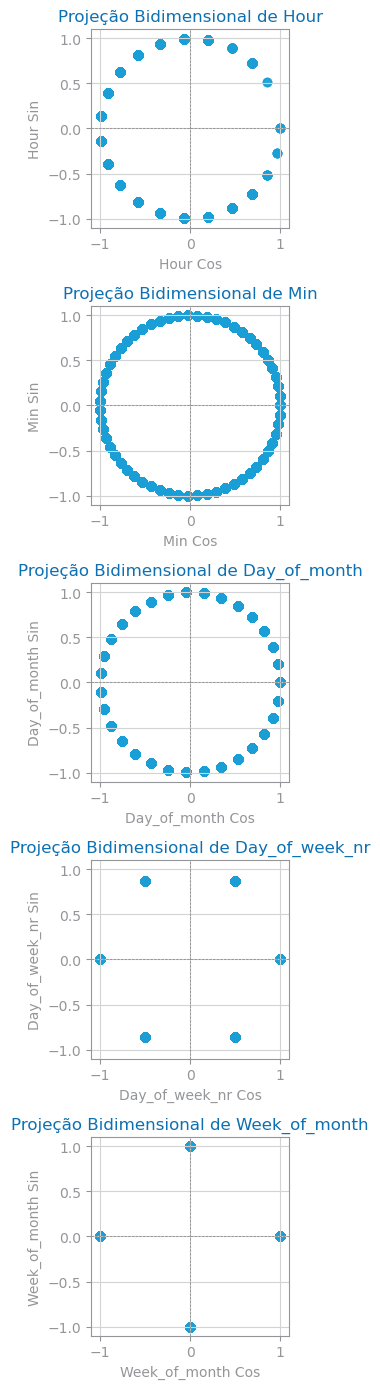

In [11]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = data_enc[f'{var}_cos']
    y_values = data_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


In [12]:
data_enc.columns

Index(['platform', 'email_provider', 'is_clicked', 'campaign_type',
       'channel_cmp', 'topic', 'total_count', 'subject_length',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos'],
      dtype='object')

In [13]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203450 entries, 0 to 203449
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      97107 non-null   float64
 1   email_provider                128165 non-null  float64
 2   is_clicked                    203450 non-null  int64  
 3   campaign_type                 203450 non-null  int64  
 4   channel_cmp                   203450 non-null  int64  
 5   topic                         201800 non-null  float64
 6   total_count                   148530 non-null  float64
 7   subject_length                163867 non-null  float64
 8   subject_with_personalization  163867 non-null  float64
 9   subject_with_deadline         163867 non-null  float64
 10  subject_with_emoji            163867 non-null  float64
 11  subject_with_bonuses          163867 non-null  float64
 12  subject_with_discount         163867 non-nul

# Validate float variables

fazer script em que valido quais são float dentro de cada coluna, e quais nao sao. 
se nao forem float, ver os valores la dentro que nao sao int, e eliminar esses. 

In [14]:
print("DataFrame original:")
print(data_enc)

# Função para validar, listar e remover valores que não são float, preservando os NaNs existentes e exibindo valores únicos
def remove_non_float_records_and_convert(data: pd.DataFrame) -> pd.DataFrame:
    rows_to_remove = set()  # Usar um conjunto para armazenar as linhas a serem removidas
    values_removed = {}  # Dicionário para armazenar os valores removidos por coluna

    for col in data.columns:
        # Detectar valores não numéricos, excluindo os NaNs existentes
        mask_non_float = ~pd.to_numeric(data[col], errors='coerce').notna() & data[col].notna()
        non_float_values = data[col][mask_non_float].unique()  # Pegando apenas os valores únicos

        # Verificar se existem valores não numéricos e exibi-los
        if len(non_float_values) > 0:
            values_removed[col] = non_float_values.tolist()
            print(f"Valores não numéricos distintos removidos na variável '{col}': {values_removed[col]}")

            # Adicionar os índices das linhas que contêm esses valores ao conjunto de remoção
            rows_to_remove.update(data.index[mask_non_float].tolist())

    # Remover as linhas que possuem valores não numéricos
    data = data.drop(index=rows_to_remove).reset_index(drop=True)

    # Converter as colunas restantes para float, ignorando os NaNs
    for col in data.columns:
        # Tentar converter a coluna para float, se falhar, manter como está
        try:
            data[col] = data[col].astype(float)
        except ValueError:
            pass  # Se não conseguir converter, não faz nada

    return data

# Aplicar a função no seu DataFrame chamado data_enc
cleaned_data_enc = remove_non_float_records_and_convert(data_enc)

print("\nDataFrame após limpeza e conversão:")
print(cleaned_data_enc)

DataFrame original:
        platform  email_provider  is_clicked  campaign_type  channel_cmp  \
0            3.0             2.0           1              2            0   
1            3.0             0.0           1              2            0   
2            NaN             0.0           0              2            0   
3            NaN             1.0           0              1            1   
4            3.0             1.0           0              2            0   
...          ...             ...         ...            ...          ...   
203445       3.0             1.0           1              2            0   
203446       3.0             1.0           0              2            0   
203447       3.0             1.0           0              2            0   
203448       0.0             0.0           0              2            0   
203449       NaN             1.0           0              1            1   

        topic  total_count  subject_length  subject_with_personaliz

In [15]:
cleaned_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195562 entries, 0 to 195561
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      91235 non-null   float64
 1   email_provider                120277 non-null  float64
 2   is_clicked                    195562 non-null  float64
 3   campaign_type                 195562 non-null  float64
 4   channel_cmp                   195562 non-null  float64
 5   topic                         193912 non-null  float64
 6   total_count                   148530 non-null  float64
 7   subject_length                162800 non-null  float64
 8   subject_with_personalization  162800 non-null  float64
 9   subject_with_deadline         162800 non-null  float64
 10  subject_with_emoji            162800 non-null  float64
 11  subject_with_bonuses          162800 non-null  float64
 12  subject_with_discount         162800 non-nul

# Correlation analysis
Before doing this, convert all symbolic variables into numeric ones, and then compute corr matrix.
(See how in Variable Encoding Lab) 

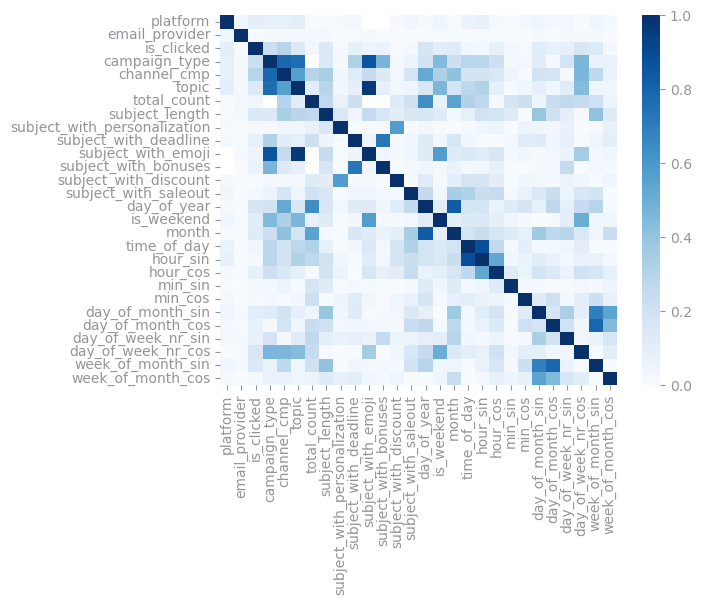

In [16]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
#from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(cleaned_data_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = cleaned_data_enc.corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=cleaned_data_enc.columns,
    yticklabels=cleaned_data_enc.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"./{file_tag}_correlation_analysis.png")
show()

# Save df from preprocessing into a csv file

In [17]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_msg_encoded.csv'

# Salvar o DataFrame em CSV
cleaned_data_enc.to_csv(filepath, index=False)

## Split data between train and test dataset
- split 70/30 and use the most recent records to the test data